<a href="https://colab.research.google.com/github/ofgkts/Portfolio-Projects/blob/main/bus_delays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bus Breakdown Delays


In [ ]:
import pandas as pd
import numpy as np
bus=pd.read_csv('/content/drive/MyDrive/proje/Omer Code/projects/bus_breakdown/bus-breakdowns-delays.csv')
df=bus.copy()
df.head()

<ipython-input-4-50c2f609ebd6>:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  bus=pd.read_csv('/content/drive/MyDrive/proje/Omer Code/projects/bus_breakdown/bus-breakdowns-delays.csv')


,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,New Jersey,...,NaN,11,Yes,No,Yes,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:12:14 AM,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,Manhattan,...,20MNS,2,Yes,Yes,No,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:13:34 AM,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,11/05/2015 08:09:00 AM,11/05/2015 08:13:00 AM,Bronx,...,15MIN,8,Yes,Yes,Yes,11/05/2015 08:13:00 AM,NaN,11/05/2015 08:13:22 AM,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,11/05/2015 08:12:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,15 MIN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:04 AM,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,11/05/2015 08:13:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,NaN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:08 AM,Running Late,School-Age


### About Dataset
`The Bus Breakdown and Delay system collects information from school bus vendors operating out in the field in real time. Bus staff that encounter delays during the route are instructed to radio the dispatcher at the bus vendor’s central office. The bus vendor staff are then instructed to log into the Bus Breakdown and Delay system to record the event and notify OPT. OPT customer service agents use this system to inform parents who call with questions regarding bus service. The Bus Breakdown and Delay system is publicly accessible and contains real time updates. All information in the system is entered by school bus vendor staf`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545691 entries, 0 to 545690
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      545691 non-null  object
 1   Busbreakdown_ID                  545691 non-null  int64 
 2   Run_Type                         545685 non-null  object
 3   Bus_No                           545678 non-null  object
 4   Route_Number                     545684 non-null  object
 5   Reason                           545689 non-null  object
 6   Schools_Serviced                 545684 non-null  object
 7   Occurred_On                      545691 non-null  object
 8   Created_On                       545691 non-null  object
 9   Boro                             534474 non-null  object
 10  Bus_Company_Name                 545691 non-null  object
 11  How_Long_Delayed                 491627 non-null  object
 12  Number_Of_Studen

In [ ]:
df.isna().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                                6
Bus_No                                 13
Route_Number                            7
Reason                                  2
Schools_Serviced                        7
Occurred_On                             0
Created_On                              0
Boro                                11217
Bus_Company_Name                        0
How_Long_Delayed                    54064
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    534801
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

<Axes: >

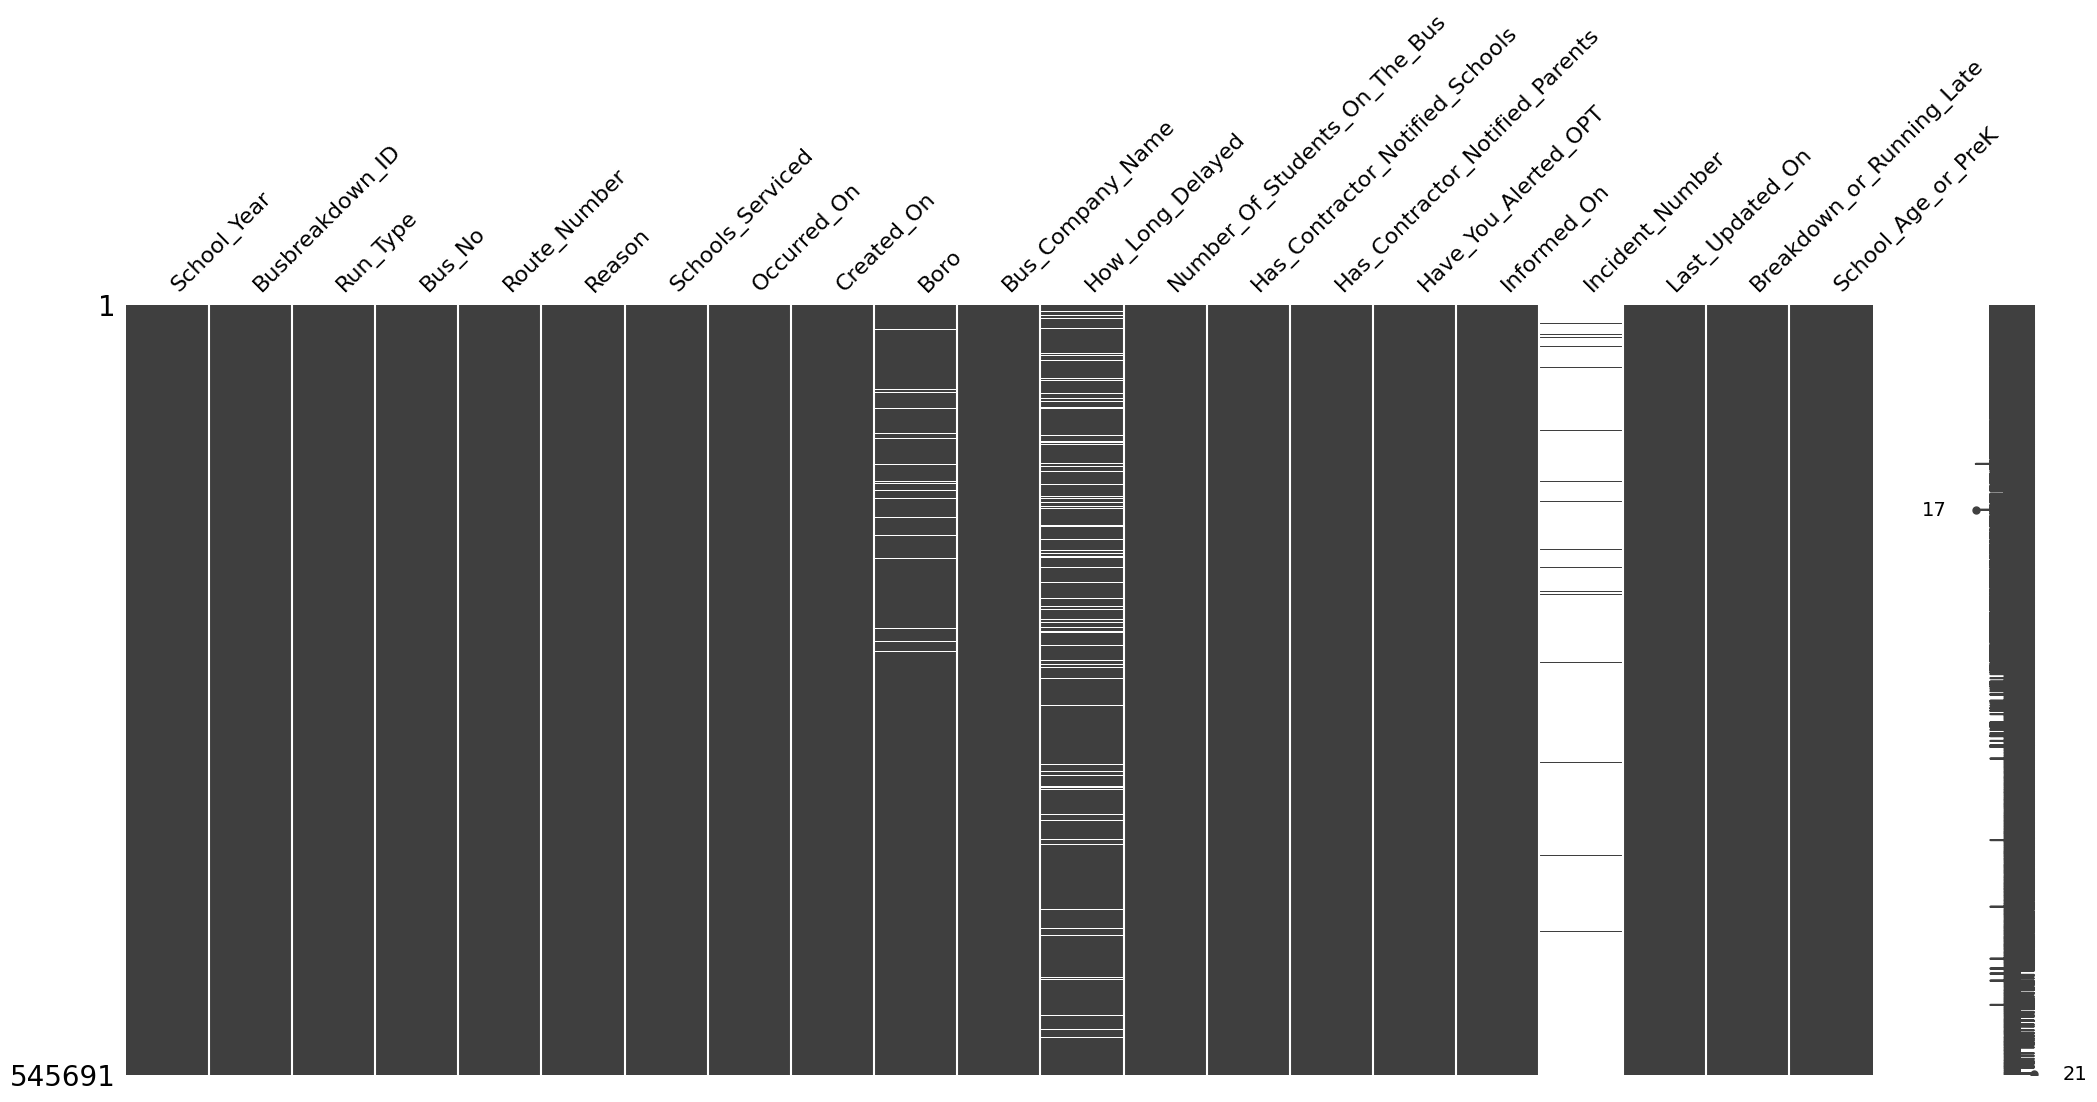

In [ ]:
import missingno as msno
msno.matrix(df)


 i will drop incident number

  there is columns to change datetime year ,minute
  
   target is how long it delayed and it is had null values i am going to split nulls another dataframe  

 look correleation and drop low or non correlated columns
 maybe i could predict boro too it is borough change column name

 i need to detect  are there any outliers

 look what is the nulls  in other columns

 i could work on what is may be the reasons of possible reasons  

In [ ]:
df.drop('Incident_Number',axis=1,inplace=True)#drop null column
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df['Created_On'] = pd.to_datetime(df['Created_On'])
df['Informed_On'] = pd.to_datetime(df['Informed_On'])
df['Last_Updated_On'] = pd.to_datetime(df['Last_Updated_On'])
#change datetime type

In [ ]:
df[['school_start_year','school_end_year']]=df['School_Year'].str.split('-',expand=True)
#split for the date time changing

In [ ]:
df["school_start_year"] = pd.to_datetime(df["school_start_year"])
df["school_end_year"] = pd.to_datetime(df["school_end_year"])
#it includes months and days change them

In [ ]:
df["school_start_year"] = df["school_start_year"].dt.year
df["school_end_year"] = df["school_end_year"].dt.year


In [ ]:
df=df.rename(columns={'Boro':'Borough'})
df.drop('School_Year',axis=1,inplace=True)
df1=df[df['How_Long_Delayed'].notna()]

In [ ]:
df1['How_Long_Delayed'].value_counts().head(50)#this is some shitty data i need to clean it include mins minute this column my target column also i need to I also need to handle values ​​that give minute intervals

31-45 Min     119486
16-30 Min     111475
46-60 Min      64958
0-15 Min       40152
61-90 Min      27713
20 MINS         5730
30 MINS         4688
30 minutes      3757
15 mins         3538
30MINS          3207
20 mins         3170
20 min          2940
30 min          2928
15 MINS         2853
20 MIN          2624
30 MIN          2539
20              2499
15MINS          1989
30 mins         1903
15 minutes      1787
45 MIN          1785
25 MIN          1746
45 MINS         1716
20-30 min       1570
25 MINS         1540
10 mins         1472
30mins          1371
15 min          1315
45MINS          1297
20mins          1267
30min           1125
15MIN           1120
20-30mins       1089
20MIN           1064
25 min          1039
45MIN           1033
15              1015
20 MINTUES      1013
30               980
10 MIN           953
1 hr             875
15-20 min        869
25-30 MIN        828
20 minutes       823
25 mins          800
25 MINUTES       786
45 mins          764
20MINS       

In [ ]:
df1['How_Long_Delayed'].value_counts().tail(50)

120min        1
40-1hr        1
35 MIN+       1
35 SM         1
5:mins        1
02:19 am      1
140/15        1
1405          1
40 MIN.,      1
1310          1
30 MIN9       1
715           1
35min/45mi    1
30MIM         1
55MIN         1
30mnis        1
3MN           1
60 Minutes    1
145 Min.      1
15MIINS       1
45min -1hr    1
10 - 15 mi    1
20-30 mn      1
401 min       1
30 mun        1
45HR          1
2640          1
30MIN ?       1
1hr 45min     1
54MIN         1
800 min       1
14 MINUTES    1
454 min       1
25 minute.    1
50-60 mins    1
one hour      1
5819d         1
20 MINS?      1
25min/30mi    1
4104          1
20-25 Min     1
11/10/16      1
1:40 MINS     1
30 mins.2     1
35mint        1
30min???      1
30min??       1
39 MINS       1
est. 25min    1
45 MINIUTE    1
Name: How_Long_Delayed, dtype: int64

In [ ]:
a=['h','H']
mask = df1['How_Long_Delayed'].str.contains('|'.join(a), case=False)
df_filtered = df1[mask]
value_counts = df_filtered['How_Long_Delayed'].value_counts()

value_counts[:60]

1 hr          875
1 HOUR        668
1 hour        529
1 HR          425
1HR           334
1hr           290
1 Hour        226
1/2 HOUR       98
1HOUR          80
1 Hr           49
2HRS           44
1hour          37
1/2 hour       37
45min/1hr      35
1 hr 30min     29
1/2 hr         28
1 hr 30 mi     26
1HRS           25
1 HR.          20
1hr 30mins     16
2 hours        15
1hr 15mins     15
1/2 HOUR?      15
45-1hr         14
45 min-1 h     14
2 HRS          14
1hr 20mins     14
1.5 hour       10
1 1/2 HR        9
2 hrs           9
2 HOURS         7
1 hr 30         7
45 min-1hr      7
1hr 30 min      6
1HR 30 MIN      6
1hr?????        6
45MIN-1HR       5
45-1hour        5
1hr/30min       5
45 -1 hour      5
1 hrs           4
45min-1hr       4
2 hr            4
1hr????         4
1hr 30min       3
1hr-1 1/2       3
1 HRS           3
45-1 HR         3
2hr             3
2 hour          3
1 hr.           3
1.5 HRS         3
1/2hour         3
1 HOUR 15M      3
45min-1 hr      3
45-1HR    

# solution path
### my path is going to slice  data frame by minutes or hour which contains h, hr or m minute
### how this is will be
+ i will first drop data not having any number in it
+ after then lower data
+ after define hour data with contains any h in it and define minute data by dropping hour from main data

### after then turn hour ones minute and if it is sliced take avarage in column
### also minute one is needs to clean but it is going to more easy  it's path is the same clean minute part and take average of two sliced part

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491627 entries, 1 to 545690
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Busbreakdown_ID                  491627 non-null  int64         
 1   Run_Type                         491622 non-null  object        
 2   Bus_No                           491615 non-null  object        
 3   Route_Number                     491620 non-null  object        
 4   Reason                           491625 non-null  object        
 5   Schools_Serviced                 491620 non-null  object        
 6   Occurred_On                      491627 non-null  datetime64[ns]
 7   Created_On                       491627 non-null  datetime64[ns]
 8   Borough                          481523 non-null  object        
 9   Bus_Company_Name                 491627 non-null  object        
 10  How_Long_Delayed                 491627 non-

In [ ]:
# check if there is a number in the column
df['Has_Number'] = df1['How_Long_Delayed'].str.contains('\d+')

# drop rows where there is no number
df2 = df[df['Has_Number'] == True].reset_index(drop=True)

# drop the temporary column 'Has_Number'
df2.drop('Has_Number', axis=1, inplace=True)

In [ ]:
#basic table for the being sure
df2.iloc[:10,5:12]

,Schools_Serviced,Occurred_On,Created_On,Borough,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus
0,06716,2015-11-05 08:10:00,2015-11-05 08:12:00,Manhattan,HOYT TRANSPORTATION CORP.,20MNS,2
1,C445,2015-11-05 08:09:00,2015-11-05 08:13:00,Bronx,"G.V.C., LTD.",15MIN,8
2,02699,2015-11-05 08:12:00,2015-11-05 08:14:00,Manhattan,"RELIANT TRANS, INC. (B232",15 MIN,6
3,75407,2015-11-05 07:58:00,2015-11-05 08:14:00,Westchester,CHILDREN`S TRANS INC. (B2,30 min,1
4,75670,2015-11-05 08:24:00,2015-11-05 08:15:00,Westchester,MAR-CAN TRANSPORT CO. INC,20MINS,3
5,03417,2015-11-05 08:15:00,2015-11-05 08:16:00,Manhattan,LEESEL TRANSP CORP (B2192,15,3
6,01450,2015-11-05 07:55:00,2015-11-05 08:17:00,Manhattan,CONSOLIDATED BUS TRANS. I,30 mins,5
7,02930,2015-11-05 08:16:00,2015-11-05 08:17:00,Manhattan,LEESEL TRANSP CORP (B2192,20,3
8,03004,2015-11-05 08:19:00,2015-11-05 08:20:00,Manhattan,LEESEL TRANSP CORP (B2192,20,3
9,C601,2015-11-05 08:19:00,2015-11-05 08:20:00,Bronx,"G.V.C., LTD.",30 MINS,13


In [ ]:
df2['How_Long_Delayed'].value_counts().tail(20)

1hr/15min     1
218           1
75MINS        1
45 MIN S      1
NI0933        1
30mini        1
20-30 mn      1
30 mmins.     1
15-250        1
75 MINS       1
20 MI N       1
1hrs 20mnt    1
35 mnis       1
10 mims       1
35 MINSS      1
190mins       1
25-30 MN      1
45 INUTES     1
45min -1hr    1
45 MINIUTE    1
Name: How_Long_Delayed, dtype: int64

In [ ]:
#making them all lower for cleaning
df2['How_Long_Delayed']=df2['How_Long_Delayed'].str.lower()

In [ ]:
#splitting them for cleaning easier
hours_df = df2.loc[df2['How_Long_Delayed'].str.contains('h')]

In [ ]:
minute_df = df2.drop(hours_df.index)

In [ ]:
minute_df['How_Long_Delayed'].value_counts()

31-45 min     119486
16-30 min     111475
46-60 min      64958
0-15 min       40152
61-90 min      27713
               ...  
6 mis              1
30 mmins.          1
15-250             1
20 mi n            1
45 miniute         1
Name: How_Long_Delayed, Length: 1284, dtype: int64

In [ ]:
import re
# Iterate through each row of the dataframe
for i, row in minute_df.iterrows():
    if '-' in row['How_Long_Delayed'] or '/' in row['How_Long_Delayed']:
        # If there is "-" or "/", split the value and append a new column
        parts = re.split(r'-|/', row['How_Long_Delayed'])
        minute_df.at[i, 'How_Long_Delayed'] = parts[0]
        minute_df.at[i, 'Second_Delayed'] = parts[1]
    else:
        # If there is no "-" or "/", append the data itself to the new column
        minute_df.at[i, 'Second_Delayed'] = row['How_Long_Delayed']

In [ ]:
minute_df.columns

Index(['Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason',
       'Schools_Serviced', 'Occurred_On', 'Created_On', 'Borough',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK', 'school_start_year',
       'school_end_year', 'Second_Delayed'],
      dtype='object')

In [ ]:
minute_df['Second_Delayed'].head(20)

0         20mns
1         15min
2        15 min
3        30 min
4        20mins
5            15
6       30 mins
7            20
8            20
9       30 mins
10       30 min
11       15 min
12      40 miin
13       10 min
14       15 min
15        10min
16       20 min
17    10minutes
18      30 mins
19      15 mins
Name: Second_Delayed, dtype: object

In [ ]:
minute_df['How_Long_Delayed'].head(20)

0         20mns
1         15min
2        15 min
3        30 min
4        20mins
5            15
6       30 mins
7            20
8            20
9       30 mins
10       30 min
11       15 min
12      40 miin
13       10 min
14       15 min
15        10min
16       20 min
17    10minutes
18      30 mins
19           10
Name: How_Long_Delayed, dtype: object

In [ ]:
# Use regular expressions to extract only the numeric values
minute_df['How_Long_Delayed'] = minute_df['How_Long_Delayed'].apply(lambda x: re.sub("[^0-9]", "", x))
minute_df['Second_Delayed'] = minute_df['Second_Delayed'].apply(lambda x: re.sub("[^0-9]", "", x))


In [ ]:
minute_df['How_Long_Delayed'].head()

0    20
1    15
2    15
3    30
4    20
Name: How_Long_Delayed, dtype: object

In [ ]:
empty_rows = minute_df[minute_df['How_Long_Delayed'] == '']
empty_rows1 = minute_df[minute_df['Second_Delayed'] == '']



print(empty_rows)

        Busbreakdown_ID           Run_Type  Bus_No Route_Number  \
3865            1234847           Pre-K/EI  GV0811            1   
5938            1234854           Pre-K/EI  GV9307            3   
144957          1273933  Special Ed AM Run    6014         R052   

               Reason Schools_Serviced         Occurred_On  \
3865    Heavy Traffic             C195 2015-12-08 07:43:00   
5938    Heavy Traffic             C195 2015-12-08 07:46:00   
144957  Heavy Traffic            31059 2016-06-07 07:59:00   

                Created_On        Borough           Bus_Company_Name  ...  \
3865   2015-12-08 07:41:00          Bronx               G.V.C., LTD.  ...   
5938   2015-12-08 07:44:00          Bronx               G.V.C., LTD.  ...   
144957 2016-06-07 08:04:00  Staten Island  PIONEER TRANSPORTATION CO  ...   

       Has_Contractor_Notified_Schools  Has_Contractor_Notified_Parents  \
3865                               Yes                              Yes   
5938                   

In [ ]:
#drop empty rows
minute_df.drop(empty_rows.index, inplace=True)
minute_df.drop(empty_rows1.index, inplace=True)
# Convert 'How_Long_Delayed' and 'Second_Delayed' columns to float data type
minute_df['How_Long_Delayed'] = minute_df['How_Long_Delayed'].astype(float)
minute_df['Second_Delayed'] = minute_df['Second_Delayed'].astype(float)

# Calculate the average of 'How_Long_Delayed' and 'Second_Delayed' columns and store in a new column 'Minute_Delayed'
minute_df['Minute_Delayed'] = (minute_df['How_Long_Delayed'] + minute_df['Second_Delayed']) / 2

# Drop the 'How_Long_Delayed' and 'Second_Delayed' columns
minute_df.drop(columns=['How_Long_Delayed', 'Second_Delayed'], inplace=True)

# Rename the 'Minute_Delayed' column to 'How_Long_Delayed'
minute_df.rename(columns={'Minute_Delayed': 'How_Long_Delayed'}, inplace=True)


In [ ]:
minute_df['How_Long_Delayed'].head(20)

0     20.0
1     15.0
2     15.0
3     30.0
4     20.0
5     15.0
6     30.0
7     20.0
8     20.0
9     30.0
10    30.0
11    15.0
12    40.0
13    10.0
14    15.0
15    10.0
16    20.0
17    10.0
18    30.0
19    12.5
Name: How_Long_Delayed, dtype: float64

nice it all works nicely for minute now it is time for hour dataframe before i split

In [ ]:

hours_df['How_Long_Delayed'].value_counts()

1 hour        1423
1 hr          1349
1hr            625
1/2 hour       135
1hour          118
              ... 
45min -1hr       1
1hrs 20mnt       1
1hr/15min        1
1hr45min         1
1:00 hour        1
Name: How_Long_Delayed, Length: 134, dtype: int64

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4247 entries, 64 to 274541
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Busbreakdown_ID                  4247 non-null   int64         
 1   Run_Type                         4247 non-null   object        
 2   Bus_No                           4247 non-null   object        
 3   Route_Number                     4247 non-null   object        
 4   Reason                           4247 non-null   object        
 5   Schools_Serviced                 4247 non-null   object        
 6   Occurred_On                      4247 non-null   datetime64[ns]
 7   Created_On                       4247 non-null   datetime64[ns]
 8   Borough                          4145 non-null   object        
 9   Bus_Company_Name                 4247 non-null   object        
 10  How_Long_Delayed                 4247 non-null   object  

In [ ]:
hours_df['How_Long_Delayed'].value_counts().head(50)

1 hour        1423
1 hr          1349
1hr            625
1/2 hour       135
1hour          118
2hrs            46
45min/1hr       35
1 hr 30min      30
1 hr 30 mi      28
1/2 hr          28
1hrs            25
1 hr.           24
2 hours         24
2 hrs           23
45-1hr          17
1hr 30mins      16
1hr 15mins      15
1/2 hour?       15
1hr 20mins      14
45 min-1 h      14
1hr 30 min      12
1.5 hour        10
1 1/2 hr         9
45min-1hr        9
45 min-1hr       7
1 hrs            7
1 hr 30          7
1hr 30min        6
1hr?????         6
2 hour           5
45-1hour         5
45 -1 hour       5
1hr/30min        5
1 hours          4
2hr              4
1hr????          4
2 hr             4
2:hr             4
1:hr             4
45-1 hr          3
1 hour 15m       3
45min-1 hr       3
50-1hr           3
1hr-1 1/2        3
1.5 hrs          3
1/2hour          3
45mins 1hr       2
1hr +            2
2:hrs            2
1 1/2 hour       2
Name: How_Long_Delayed, dtype: int64

In [ ]:
hours_df['How_Long_Delayed'].value_counts().tail(50)

1hoiur        1
2hours        1
1hr/30min?    1
3 hour        1
30 hr         1
1hr 10mins    1
1hr 20 min    1
1hour 30mi    1
4 hrs         1
1 hourr       1
1-hours       1
1 hourhalf    1
1hr20min      1
1 houir       1
50-1 hour     1
hr1           1
1-hour        1
1hr - 11/2    1
ha 9944       1
ihr40min      1
30mins-1hr    1
1 hour lat    1
45min - 1h    1
45minto 1h    1
30hr          1
1hr/????mi    1
451hr         1
40/1hr        1
4 hours       1
1h15min       1
1hr20 mins    1
1h            1
45/1hr        1
1hr 45mins    1
45 -1hour     1
1hr&30min     1
1:00 h        1
1 hr+         1
45mini/1hr    1
1:30 h        1
30hour        1
1 hour1/2     1
1/2  hour     1
1hr 45min     1
45hr          1
45min -1hr    1
1hrs 20mnt    1
1hr/15min     1
1hr45min      1
1:00 hour     1
Name: How_Long_Delayed, dtype: int64

In [ ]:
hours_df['How_Long_Delayed'].value_counts()[50:100]

1hr. 20 mi    2
1hr 40 min    2
50min 1hr     2
1 hr 15       2
1hr???        2
1hr 45 min    2
1hr/20min     2
1 hour?       2
1hr/1hr 30    2
40-1hr        2
1 h           2
2 hrs.        2
1hour 20mi    2
1hr - 1:45    1
2.0 hrs       1
1hr late      1
1 hr 15min    1
1:30 hr       1
45/1hour      1
1hour15min    1
1hour45min    1
3 hrs         1
\1 hr-        1
40-1 hour     1
1hr++         1
45 min/1hr    1
1hr /30min    1
1 hour 15     1
1ho           1
1hr??         1
3 hr          1
2 hours tr    1
1:45hr        1
1:30 h/       1
1hoiur        1
2hours        1
1hr/30min?    1
3 hour        1
30 hr         1
1hr 10mins    1
1hr 20 min    1
1hour 30mi    1
4 hrs         1
1 hourr       1
1-hours       1
1 hourhalf    1
1hr20min      1
1 houir       1
50-1 hour     1
hr1           1
Name: How_Long_Delayed, dtype: int64

In [ ]:
hours_df_copy1=hours_df.copy()
# create a new column 'How_Long_Delayed_Cleaned'
hours_df_copy1['How_Long_Delayed_Cleaned'] = hours_df_copy1['How_Long_Delayed']

# iterate through each row of the dataframe
for i, row in hours_df_copy1.iterrows():
    delay = row['How_Long_Delayed_Cleaned']

    # check if delay contains '/' or '-'
    if '/' in delay or '-' in delay:
        # split the delay by '/' or '-'
        parts = delay.split('/' if '/' in delay else '-')

        # replace original delay with first splitted part
        hours_df_copy1.at[i, 'How_Long_Delayed_Cleaned'] = parts[0].strip()

        # append second splitted part to new column
        hours_df_copy1.at[i, 'How_Long_Delayed_Additional'] = parts[1].strip() if len(parts) > 1 else '0'
    else:
        # append the data itself to new column if delay does not contain '/' or '-'
        hours_df_copy1.at[i, 'How_Long_Delayed_Additional'] = delay.strip()


In [ ]:
hours_df_copy1['How_Long_Delayed_Cleaned'].head()

64        1hr
77        1hr
272       1hr
365    1 hour
370    1 hour
Name: How_Long_Delayed_Cleaned, dtype: object

In [ ]:
hours_df['How_Long_Delayed'].head()

64           1hr
77           1hr
272    1hr/30min
365       1 hour
370       1 hour
Name: How_Long_Delayed, dtype: object

In [ ]:
hours_df_copy1['How_Long_Delayed_Additional'].head()

64        1hr
77        1hr
272     30min
365    1 hour
370    1 hour
Name: How_Long_Delayed_Additional, dtype: object

In [ ]:

# replace any characters that are not numbers, '-', '/', 'h', or 'm'
hours_df_copy1['How_Long_Delayed_Cleaned'] = hours_df_copy1['How_Long_Delayed_Cleaned'].str.replace(r'[^\d\-\/hm]', '')

# add a space before 'h' and 'm'
hours_df_copy1['How_Long_Delayed_Cleaned'] = hours_df_copy1['How_Long_Delayed_Cleaned'].str.replace(r'(h|m)', r' \1').str.strip()

# replace any characters that are not numbers, '-', '/', 'h', or 'm'
hours_df_copy1['How_Long_Delayed_Additional'] = hours_df_copy1['How_Long_Delayed_Additional'].str.replace(r'[^\d\-\/hm]', '')

# add a space before 'h' and 'm'
hours_df_copy1['How_Long_Delayed_Additional'] = hours_df_copy1['How_Long_Delayed_Additional'].str.replace(r'(h|m)', r' \1').str.strip()

# display the updated dataframe
hours_df_copy1['How_Long_Delayed_Additional'].value_counts().head(50)




<ipython-input-42-6c91c64e538e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  hours_df_copy1['How_Long_Delayed_Cleaned'] = hours_df_copy1['How_Long_Delayed_Cleaned'].str.replace(r'[^\d\-\/hm]', '')
<ipython-input-42-6c91c64e538e>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  hours_df_copy1['How_Long_Delayed_Cleaned'] = hours_df_copy1['How_Long_Delayed_Cleaned'].str.replace(r'(h|m)', r' \1').str.strip()
<ipython-input-42-6c91c64e538e>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  hours_df_copy1['How_Long_Delayed_Additional'] = hours_df_copy1['How_Long_Delayed_Additional'].str.replace(r'[^\d\-\/hm]', '')
<ipython-input-42-6c91c64e538e>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  hours_df_copy1['How_Long_Delayed_Additional'] = hours_df_copy1['How_Long_Delayed_Additional'].str.r

1 h        3721
2 h         309
1 h30 m      94
1 h20 m      22
1 h15 m      21
15 h         13
1 h30         9
30 m          7
1 h45 m       6
2             5
1 h15         3
3 h           3
30 h          3
45 m1 h       3
20 m          2
1 h40 m       2
100 h         2
h             2
130 h         2
              2
50 m1 h       2
4 h           2
1 h10 m       1
145 h         1
145           1
h9944         1
45 h          1
15 m          1
h1            1
h40 m         1
451 h         1
1 h h         1
m             1
20 h          1
Name: How_Long_Delayed_Additional, dtype: int64

In [ ]:
hours_df_copy1['How_Long_Delayed_Cleaned'].value_counts().head(50)
hours_df_copy1 = hours_df_copy1.drop(hours_df_copy1[hours_df_copy1['How_Long_Delayed_Cleaned'] == '45 m1 '].index)

In [ ]:
def split_hours_minutes(dataframe, column_name):
    # create two new columns to hold the hours and minutes values
    dataframe['Hours_Delayed'] = 0
    dataframe['Minutes_Delayed'] = 0

    for index, row in dataframe.iterrows():
        # check if the value contains both "h" and "m"
        if 'h' in row[column_name] and 'm' in row[column_name]:
            # split the value by "h" and extract the hours and minutes parts
            parts = row[column_name].split('h')
            hours = parts[0]
            minutes = parts[1].strip().split('m')[0]
            # assign the values to the corresponding columns
            dataframe.at[index, 'Hours_Delayed'] = hours
            dataframe.at[index, 'Minutes_Delayed'] = minutes
        # if the value only contains "h", extract the hours part and set minutes to 0
        elif 'h' in row[column_name]:
            hours = row[column_name].split('h')[0]
            dataframe.at[index, 'Hours_Delayed'] = hours
        # if the value only contains "m", extract the minutes part and set hours to 0
        elif 'm' in row[column_name]:
            minutes = row[column_name].split('m')[0]
            dataframe.at[index, 'Minutes_Delayed'] = minutes
        # if the value doesn't contain either "h" or "m", set both hours and minutes to 0
        else:
            dataframe.at[index, 'Hours_Delayed'] = 0
            dataframe.at[index, 'Minutes_Delayed'] = 0
    return dataframe


In [ ]:
split_hours_minutes(hours_df_copy1,'How_Long_Delayed_Cleaned')
hours_df_copy1['How_Long_Delayed_Cleaned'].value_counts().head(50)


1 h        3622
1           184
2 h         116
1 h30 m      94
45 m         72
45           33
1 h20 m      22
1 h15 m      21
15 h         13
11           11
1 h30         7
1 h45 m       6
40            4
1 h-11        4
50            4
3 h           3
130 h         3
45 m1 h       3
30 h          3
1 h15         3
4 h           2
50 m1 h       2
100 h         2
1 h40 m       2
145 h         1
1 h10 m       1
1 h h         1
30 m          1
h40 m         1
1 h1          1
45 h          1
h1            1
451 h         1
h9944         1
20 h          1
Name: How_Long_Delayed_Cleaned, dtype: int64

In [ ]:
hours_df_copy1['Minutes_Delayed'].value_counts().head(50)


0      4022
30       95
45       78
20       22
15       21
          5
40        3
10        1
Name: Minutes_Delayed, dtype: int64

In [ ]:
#there are some empty rows drop these
hours_df_copy1['Hours_Delayed'].value_counts().head(50)
empty_rows = hours_df_copy1[hours_df_copy1['Minutes_Delayed'] == '']
empty_rows1 = hours_df_copy1[hours_df_copy1['Hours_Delayed'] == '']
hours_df_copy1.drop(empty_rows.index, inplace=True)
hours_df_copy1.drop(empty_rows1.index, inplace=True)


In [ ]:
hours_df_copy1['Minutes_Delayed'].value_counts()

0      4020
30       95
45       78
20       22
15       21
40        2
10        1
Name: Minutes_Delayed, dtype: int64

In [ ]:
hours_df_copy1['Hours_Delayed'].value_counts()

1       3784
0        309
2        116
15        13
30         3
130        3
3          3
4          2
100        2
451        1
45         1
145        1
20         1
Name: Hours_Delayed, dtype: int64

In [ ]:
hours_df_copy1['Hours_Delayed'] = hours_df_copy1['Hours_Delayed'].astype(float)
# Create a new dataset to store the delayed flight records with modified Hours_Delayed values
delayed_data = pd.DataFrame()

# Filter the records with Hours_Delayed values of 130, 100, 451, and 145
replace_values = hours_df_copy1[(hours_df_copy1['Hours_Delayed'] == 130) |
                                (hours_df_copy1['Hours_Delayed'] == 100) |
                                (hours_df_copy1['Hours_Delayed'] == 451) |
                                (hours_df_copy1['Hours_Delayed'] == 145)]

# Replace the Hours_Delayed values with their corresponding replacement values
replace_values.loc[replace_values['Hours_Delayed'] == 130, 'Hours_Delayed'] = 90
replace_values.loc[replace_values['Hours_Delayed'] == 100, 'Hours_Delayed'] = 60
replace_values.loc[replace_values['Hours_Delayed'] == 451, 'Hours_Delayed'] = 52
replace_values.loc[replace_values['Hours_Delayed'] == 145, 'Hours_Delayed'] = 105

# Append the modified records to delayed_data
delayed_data = delayed_data.append(replace_values)

# Drop the records with Hours_Delayed values of 130, 100, 451, and 145 from the original dataset
hours_df_copy1.drop(hours_df_copy1[(hours_df_copy1['Hours_Delayed'] == 130) |
                                   (hours_df_copy1['Hours_Delayed'] == 100) |
                                   (hours_df_copy1['Hours_Delayed'] == 451) |
                                   (hours_df_copy1['Hours_Delayed'] == 145)].index, inplace=True)


<ipython-input-50-54b6f80ecbe2>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delayed_data = delayed_data.append(replace_values)


In [ ]:
hours_df_copy1['Hours_Delayed'] = hours_df_copy1['Hours_Delayed'] * 60
hours_df_copy1['Hours_Delayed'].value_counts()


60.0      3784
0.0        309
120.0      116
900.0       13
1800.0       3
180.0        3
240.0        2
2700.0       1
1200.0       1
Name: Hours_Delayed, dtype: int64

In [ ]:
hours_df_copy1['Minutes_Delayed'] = hours_df_copy1['Minutes_Delayed'].astype(float)
hours_df_copy1['Minutes_Delayed'].value_counts()

0.0     4013
30.0      95
45.0      78
20.0      22
15.0      21
40.0       2
10.0       1
Name: Minutes_Delayed, dtype: int64

In [ ]:
#add hours and minutes
hours_df_copy1['Total_Delayed'] = hours_df_copy1['Hours_Delayed'] + hours_df_copy1['Minutes_Delayed']

In [ ]:

#drop done columns
hours_df_copy1.drop('Minutes_Delayed',axis=1,inplace=True)
hours_df_copy1.drop('Hours_Delayed',axis=1,inplace=True)

In [ ]:
hours_df_copy1['How_Long_Delayed_Additional'].value_counts()

1 h        3721
2 h         309
1 h30 m      94
1 h20 m      22
1 h15 m      21
15 h         13
1 h30         9
30 m          7
1 h45 m       6
2             5
30 h          3
1 h15         3
3 h           3
4 h           2
h             2
20 m          2
1 h40 m       2
1 h h         1
              1
1 h10 m       1
145           1
15 m          1
45 h          1
m             1
20 h          1
Name: How_Long_Delayed_Additional, dtype: int64

In [ ]:
split_hours_minutes(hours_df_copy1,'How_Long_Delayed_Additional')

,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Borough,Bus_Company_Name,...,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,school_start_year,school_end_year,How_Long_Delayed_Cleaned,How_Long_Delayed_Additional,Total_Delayed,Hours_Delayed,Minutes_Delayed
64,1227639,Project Read PM Run,2033,X901,Mechanical Problem,11455,2015-11-05 18:35:00,2015-11-05 18:45:00,Bronx,PRIDE TRANSPORTATION (SCH,...,2015-11-05 18:45:40,Running Late,School-Age,2015,2016,1 h,1 h,60.0,1,0
77,1227656,General Ed AM Run,2706,K1606,Heavy Traffic,16005,2015-11-06 06:21:00,2015-11-06 06:23:00,Brooklyn,"MV TRANSPORTATION, INC.",...,2015-11-06 06:23:03,Running Late,School-Age,2015,2016,1 h,1 h,60.0,1,0
272,1227971,Special Ed AM Run,6250,P423,Heavy Traffic,"27042,27874",2015-11-09 06:27:00,2015-11-09 06:31:00,Queens,JOFAZ TRANSPORTATION INC.,...,2015-11-09 06:31:46,Running Late,School-Age,2015,2016,1 h,30 m,60.0,0,30
365,1228871,Special Ed AM Run,54065,M123,Mechanical Problem,02051,2015-11-12 07:00:00,2015-11-12 07:17:00,Manhattan,CONSOLIDATED BUS TRANS. I,...,2015-11-12 07:17:06,Running Late,School-Age,2015,2016,1 h,1 h,60.0,1,0
370,1228881,Special Ed AM Run,10271,X199,Mechanical Problem,12486,2015-11-12 07:05:00,2015-11-12 07:19:00,Bronx,CONSOLIDATED BUS TRANS. I,...,2015-11-12 07:19:44,Running Late,School-Age,2015,2016,1 h,1 h,60.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274444,1334975,Pre-K/EI,6147,0118A,Other,C568,2017-03-28 07:15:00,2017-03-28 07:28:00,Brooklyn,L & M BUS CORP.,...,2017-03-28 10:06:13,Running Late,Pre-K,2016,2017,1 h,1 h,60.0,1,0
274447,1342022,Pre-K/EI,0057,23AM,Problem Run,C273,2017-04-25 06:30:00,2017-04-25 08:35:00,Brooklyn,SMART PICK,...,2017-04-25 10:08:07,Running Late,Pre-K,2016,2017,1 h,1 h,60.0,1,0
274484,1244822,Pre-K/EI,0017,51 AM,Other,C092,2016-01-25 06:30:00,2016-01-25 09:02:00,Brooklyn,SMART PICK,...,2016-01-25 09:02:10,Running Late,Pre-K,2015,2016,1 h,1 h,60.0,1,0
274527,1290896,Pre-K/EI,9005,3404A,Other,C505,2016-10-07 05:58:00,2016-10-07 06:03:00,Brooklyn,MJT BUS,...,2016-10-07 14:48:01,Running Late,Pre-K,2016,2017,1 h,1 h,60.0,1,0


In [ ]:
hours_df_copy1['Minutes_Delayed'].value_counts()

0      4075
30      101
20       24
15       22
45        6
40        2
          1
10        1
Name: Minutes_Delayed, dtype: int64

In [ ]:
hours_df_copy1['Hours_Delayed'].value_counts()

1      3880
2       309
0        18
15       13
30        3
3         3
4         2
          2
45        1
20        1
Name: Hours_Delayed, dtype: int64

In [ ]:
#same process again
hours_df_copy1['Hours_Delayed'].value_counts().head(50)
empty_rows = hours_df_copy1[hours_df_copy1['Minutes_Delayed'] == '']
empty_rows1 = hours_df_copy1[hours_df_copy1['Hours_Delayed'] == '']
hours_df_copy1.drop(empty_rows.index, inplace=True)
hours_df_copy1.drop(empty_rows1.index, inplace=True)

In [ ]:
#change data types
hours_df_copy1['Hours_Delayed'] = hours_df_copy1['Hours_Delayed'].astype(float)
hours_df_copy1['Minutes_Delayed'] = hours_df_copy1['Minutes_Delayed'].astype(float)
#turn hours to minute
hours_df_copy1['Hours_Delayed'] = hours_df_copy1['Hours_Delayed'] * 60
hours_df_copy1['Hours_Delayed'].value_counts()

60.0      3880
120.0      309
0.0         17
900.0       13
1800.0       3
180.0        3
240.0        2
2700.0       1
1200.0       1
Name: Hours_Delayed, dtype: int64

In [ ]:
#add again minutes abd hours
hours_df_copy1['Total_Delayed2'] = hours_df_copy1['Hours_Delayed'] + hours_df_copy1['Minutes_Delayed']

In [ ]:
hours_df_copy1.drop('Minutes_Delayed',axis=1,inplace=True)
hours_df_copy1.drop('Hours_Delayed',axis=1,inplace=True)
hours_df_copy1.drop('How_Long_Delayed_Cleaned',axis=1,inplace=True)
hours_df_copy1.drop('How_Long_Delayed_Additional',axis=1,inplace=True)

hours_df_copy1['Total_Delayed2'].value_counts()

60.0      3734
120.0      309
90.0        94
80.0        22
75.0        21
900.0       13
0.0          7
30.0         7
105.0        6
180.0        3
1800.0       3
20.0         2
100.0        2
240.0        2
15.0         1
2700.0       1
70.0         1
1200.0       1
Name: Total_Delayed2, dtype: int64

In [ ]:
#taking average
hours_df_copy1['delay_cleaned'] = hours_df_copy1.apply(lambda row: (row['Total_Delayed'] + row['Total_Delayed2'])/2, axis=1)

In [ ]:
hours_df_copy1['delay_cleaned'].value_counts()

60.0      3813
120.0      116
90.0        94
52.5        72
30.0        48
80.0        22
75.0        21
900.0       13
45.0         8
105.0        6
1800.0       3
180.0        3
240.0        2
40.0         2
100.0        2
37.5         1
2700.0       1
70.0         1
1200.0       1
Name: delay_cleaned, dtype: int64

In [ ]:
hours_df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4229 entries, 64 to 274541
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Busbreakdown_ID                  4229 non-null   int64         
 1   Run_Type                         4229 non-null   object        
 2   Bus_No                           4229 non-null   object        
 3   Route_Number                     4229 non-null   object        
 4   Reason                           4229 non-null   object        
 5   Schools_Serviced                 4229 non-null   object        
 6   Occurred_On                      4229 non-null   datetime64[ns]
 7   Created_On                       4229 non-null   datetime64[ns]
 8   Borough                          4127 non-null   object        
 9   Bus_Company_Name                 4229 non-null   object        
 10  How_Long_Delayed                 4229 non-null   object  

In [ ]:
minute_df['How_Long_Delayed'].value_counts()

38.0     119486
23.0     111494
53.0      64958
7.5       40651
75.5      27713
          ...  
218.0         1
933.0         1
132.5         1
190.0         1
154.0         1
Name: How_Long_Delayed, Length: 257, dtype: int64

In [ ]:
hours_df_copy2=hours_df_copy1.copy()
hours_df_copy2.drop('Total_Delayed',axis=1,inplace=True)
hours_df_copy2.drop('Total_Delayed2',axis=1,inplace=True)
hours_df_copy2.drop('How_Long_Delayed',axis=1,inplace=True)
# Rename the 'delay_cleaned' column to 'How_Long_Delayed'
hours_df_copy2 = hours_df_copy2.rename(columns={'delay_cleaned': 'How_Long_Delayed2'})
minute_df = minute_df.rename(columns={'How_Long_Delayed': 'How_Long_Delayed2'})
hours_df_copy2.columns

Index(['Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason',
       'Schools_Serviced', 'Occurred_On', 'Created_On', 'Borough',
       'Bus_Company_Name', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK', 'school_start_year',
       'school_end_year', 'How_Long_Delayed2'],
      dtype='object')

In [ ]:
#hours_df_copy2['How_Long_Delayed2']=hours_df_copy2['How_Long_Delayed2'].astype(float)
#minute_df['How_Long_Delayed2']=minute_df['How_Long_Delayed2'].astype(float)
#merged_df = pd.merge(minute_df, hours_df_copy2, on='How_Long_Delayed2', how='outer')
merged_df = minute_df.merge(hours_df_copy2, on=['Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason',
       'Schools_Serviced', 'Occurred_On', 'Created_On', 'Borough',
       'Bus_Company_Name', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK', 'school_start_year',
       'school_end_year', 'How_Long_Delayed2'], how='outer')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491090 entries, 0 to 491089
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Busbreakdown_ID                  491090 non-null  int64         
 1   Run_Type                         491085 non-null  object        
 2   Bus_No                           491078 non-null  object        
 3   Route_Number                     491083 non-null  object        
 4   Reason                           491088 non-null  object        
 5   Schools_Serviced                 491083 non-null  object        
 6   Occurred_On                      491090 non-null  datetime64[ns]
 7   Created_On                       491090 non-null  datetime64[ns]
 8   Borough                          480991 non-null  object        
 9   Bus_Company_Name                 491090 non-null  object        
 10  Number_Of_Students_On_The_Bus    491090 non-

In [ ]:
merged_df['Reason'].value_counts()

Heavy Traffic                  338538
Other                           73593
Mechanical Problem              26065
Problem Run                     12686
Weather Conditions              10144
Late return from Field Trip      7981
Won`t Start                      7025
Flat Tire                        6995
Accident                         4233
Delayed by School                3828
Name: Reason, dtype: int64

In [ ]:
merged_df.dropna(inplace=True)
merged_df.head()

,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Borough,Bus_Company_Name,...,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,school_start_year,school_end_year,How_Long_Delayed2
0,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,2015-11-05 08:10:00,2015-11-05 08:12:00,Manhattan,HOYT TRANSPORTATION CORP.,...,Yes,Yes,No,2015-11-05 08:12:00,2015-11-05 08:13:34,Running Late,School-Age,2015,2016,20.0
1,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,2015-11-05 08:09:00,2015-11-05 08:13:00,Bronx,"G.V.C., LTD.",...,Yes,Yes,Yes,2015-11-05 08:13:00,2015-11-05 08:13:22,Running Late,Pre-K,2015,2016,15.0
2,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,2015-11-05 08:12:00,2015-11-05 08:14:00,Manhattan,"RELIANT TRANS, INC. (B232",...,No,No,No,2015-11-05 08:14:00,2015-11-05 08:14:04,Running Late,School-Age,2015,2016,15.0
3,1227543,Special Ed AM Run,HT1502,W796,Heavy Traffic,75407,2015-11-05 07:58:00,2015-11-05 08:14:00,Westchester,CHILDREN`S TRANS INC. (B2,...,Yes,Yes,Yes,2015-11-05 08:14:00,2015-11-05 08:14:15,Running Late,School-Age,2015,2016,30.0
4,1227544,Special Ed AM Run,142,W633,Heavy Traffic,75670,2015-11-05 08:24:00,2015-11-05 08:15:00,Westchester,MAR-CAN TRANSPORT CO. INC,...,Yes,No,No,2015-11-05 08:15:00,2015-11-05 08:16:53,Running Late,School-Age,2015,2016,20.0


# detecting outliers
this is the blog posts i think useful for outliers
https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

second
https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/

third https://statisticsbyjim.com/basics/outliers/


fourth  https://statisticsbyjim.com/basics/remove-outliers/

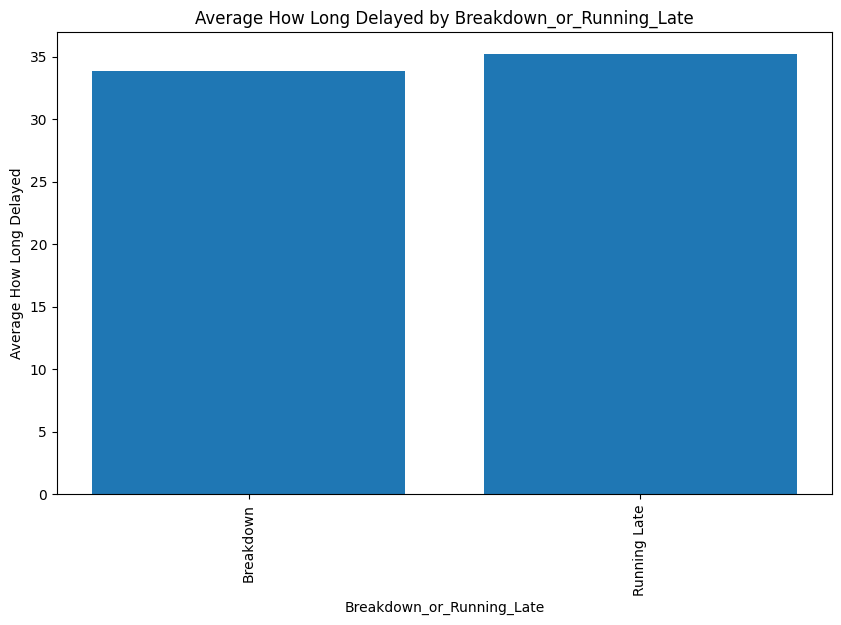

In [ ]:
import matplotlib.pyplot as plt
grouped_data = merged_df.groupby('Breakdown_or_Running_Late')['How_Long_Delayed2'].mean()

# create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.xticks(rotation=90)
plt.xlabel('Breakdown_or_Running_Late')
plt.ylabel('Average How Long Delayed')
plt.title('Average How Long Delayed by Breakdown_or_Running_Late')
plt.show()


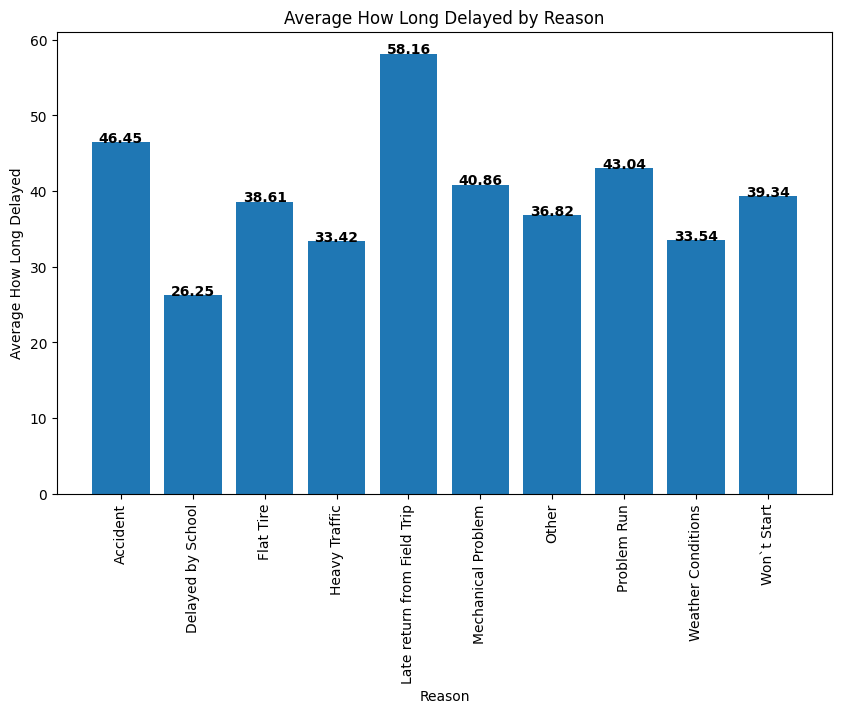

In [ ]:
import matplotlib.pyplot as plt
# calculate average of 'How_Long_Delayed' column by reason
grouped_data = merged_df.groupby('Reason')['How_Long_Delayed2'].mean()

# create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.xticks(rotation=90)
plt.xlabel('Reason')
plt.ylabel('Average How Long Delayed')
plt.title('Average How Long Delayed by Reason')

# add annotations for average values on each bar
for i, v in enumerate(grouped_data.values):
    plt.text(i, v, f'{v:.2f}', ha='center', fontweight='bold')

plt.show()



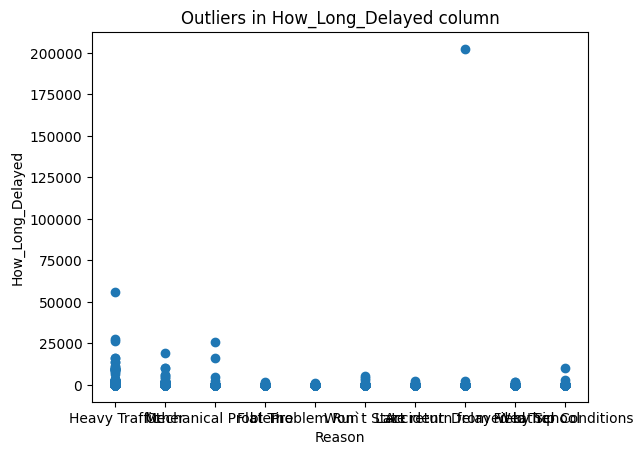

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of How_Long_Delayed vs. index
plt.scatter(merged_df['Reason'], merged_df['How_Long_Delayed2'])

# Set the x-axis label
plt.xlabel('Reason')

# Set the y-axis label
plt.ylabel('How_Long_Delayed')

# Set the plot title
plt.title('Outliers in How_Long_Delayed column')

# Display the plot
plt.show()


In [ ]:
merged_df['How_Long_Delayed2'].describe()

count    480967.000000
mean         35.206756
std         322.436808
min           0.000000
25%          23.000000
50%          30.000000
75%          38.000000
max      202340.000000
Name: How_Long_Delayed2, dtype: float64

In [ ]:
import numpy as np
from scipy import stats

# calculate z-scores for the How_Long_Delayed2 column
z_scores = np.abs(stats.zscore(merged_df['How_Long_Delayed2']))

# find indices of outliers using a threshold of 3 standard deviations
threshold = 3
outlier_indices = np.where(z_scores > threshold)

# print the outlier rows with only "Reason" and "How_Long_Delayed2" columns
print(merged_df.iloc[outlier_indices][['Reason', 'How_Long_Delayed2']])


                    Reason  How_Long_Delayed2
106          Heavy Traffic             1354.0
107          Heavy Traffic             1388.0
115          Heavy Traffic             1603.0
132          Heavy Traffic             1425.0
731          Heavy Traffic             1403.0
...                    ...                ...
487399       Heavy Traffic             1800.0
487928  Weather Conditions             2700.0
488635               Other             1800.0
489860       Heavy Traffic             1800.0
490710               Other             1200.0

[185 rows x 2 columns]


this is acceptable amount of outlier i will drop these because i think this is miss type or other reasons

In [ ]:
# drop the outlier rows from the merged_df
merged_df = merged_df.drop(merged_df.index[outlier_indices], axis=0)
merged_df.isna().sum()

Busbreakdown_ID                    0
Run_Type                           0
Bus_No                             0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Borough                            0
Bus_Company_Name                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Informed_On                        0
Last_Updated_On                    0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
school_start_year                  0
school_end_year                    0
How_Long_Delayed2                  0
dtype: int64

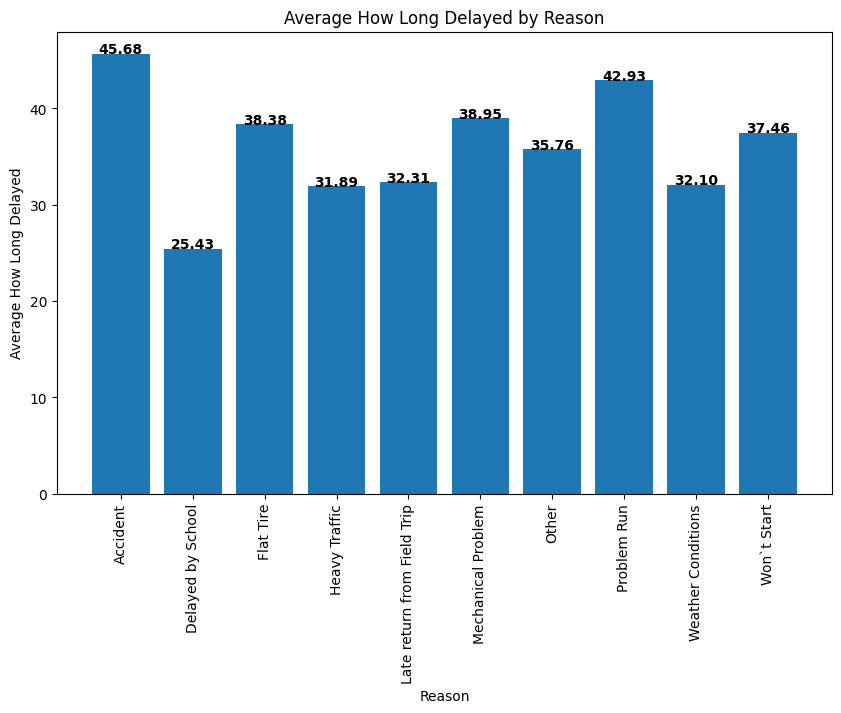

In [ ]:
# calculate average of 'How_Long_Delayed' column by reason
grouped_data = merged_df.groupby('Reason')['How_Long_Delayed2'].mean()

# create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.xticks(rotation=90)
plt.xlabel('Reason')
plt.ylabel('Average How Long Delayed')
plt.title('Average How Long Delayed by Reason')

# add annotations for average values on each bar
for i, v in enumerate(grouped_data.values):
    plt.text(i, v, f'{v:.2f}', ha='center', fontweight='bold')

plt.show()



that is some big differance

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480782 entries, 0 to 491089
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Busbreakdown_ID                  480782 non-null  int64         
 1   Run_Type                         480782 non-null  object        
 2   Bus_No                           480782 non-null  object        
 3   Route_Number                     480782 non-null  object        
 4   Reason                           480782 non-null  object        
 5   Schools_Serviced                 480782 non-null  object        
 6   Occurred_On                      480782 non-null  datetime64[ns]
 7   Created_On                       480782 non-null  datetime64[ns]
 8   Borough                          480782 non-null  object        
 9   Bus_Company_Name                 480782 non-null  object        
 10  Number_Of_Students_On_The_Bus    480782 non-

### taking a output for a visalization
but before taking a output change some datatype and splitting year and hours to new column

In [ ]:

merged_df.head()

,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Borough,Bus_Company_Name,...,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,school_start_year,school_end_year,How_Long_Delayed2
0,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,2015-11-05 08:10:00,2015-11-05 08:12:00,Manhattan,HOYT TRANSPORTATION CORP.,...,Yes,Yes,No,2015-11-05 08:12:00,2015-11-05 08:13:34,Running Late,School-Age,2015,2016,20.0
1,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,2015-11-05 08:09:00,2015-11-05 08:13:00,Bronx,"G.V.C., LTD.",...,Yes,Yes,Yes,2015-11-05 08:13:00,2015-11-05 08:13:22,Running Late,Pre-K,2015,2016,15.0
2,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,2015-11-05 08:12:00,2015-11-05 08:14:00,Manhattan,"RELIANT TRANS, INC. (B232",...,No,No,No,2015-11-05 08:14:00,2015-11-05 08:14:04,Running Late,School-Age,2015,2016,15.0
3,1227543,Special Ed AM Run,HT1502,W796,Heavy Traffic,75407,2015-11-05 07:58:00,2015-11-05 08:14:00,Westchester,CHILDREN`S TRANS INC. (B2,...,Yes,Yes,Yes,2015-11-05 08:14:00,2015-11-05 08:14:15,Running Late,School-Age,2015,2016,30.0
4,1227544,Special Ed AM Run,142,W633,Heavy Traffic,75670,2015-11-05 08:24:00,2015-11-05 08:15:00,Westchester,MAR-CAN TRANSPORT CO. INC,...,Yes,No,No,2015-11-05 08:15:00,2015-11-05 08:16:53,Running Late,School-Age,2015,2016,20.0


In [ ]:
merged_df.to_csv('finished_data.csv', index=False)

# time for detecting  correlation

same with this i put down here i find usefull articles

this is the most basic one
https://towardsdatascience.com/correlation-is-simple-with-seaborn-and-pandas-28c28e92701e


this is great https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365



also this is great with examples and explanations:http://www.sefidian.com/2020/08/02/measure-the-correlation-between-numerical-and-categorical-variables-and-the-correlation-between-two-categorical-variables-in-python-chi-square-and-anova/



In [ ]:
import pandas as pd
import scipy.stats as stats

# create a list of categorical column names
categorical_columns = ['Run_Type', 'Bus_No', 'Route_Number', 'Schools_Serviced', 'Borough', 'Bus_Company_Name',
                       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT',
                       'Breakdown_or_Running_Late', 'School_Age_or_PreK']

# loop through each categorical column and perform ANOVA test with 'How_Long_Delayed2'
for column in categorical_columns:
    if column != 'Reason':
        anova = stats.f_oneway(*(group['How_Long_Delayed2'] for name, group in merged_df.groupby(column)))
        print(f"ANOVA results for {column}: F-value = {anova.statistic}, p-value = {anova.pvalue}")


ANOVA results for Run_Type: F-value = 1121.959853654371, p-value = 0.0
ANOVA results for Bus_No: F-value = 10.670203403581871, p-value = 0.0
ANOVA results for Route_Number: F-value = 12.281058163199807, p-value = 0.0
ANOVA results for Schools_Serviced: F-value = 8.116445074249082, p-value = 0.0
ANOVA results for Borough: F-value = 1969.465622044671, p-value = 0.0
ANOVA results for Bus_Company_Name: F-value = 1424.5527265014368, p-value = 0.0
ANOVA results for Has_Contractor_Notified_Schools: F-value = 347.4321504660149, p-value = 1.6366992177233881e-77
ANOVA results for Has_Contractor_Notified_Parents: F-value = 4813.7421908362185, p-value = 0.0
ANOVA results for Have_You_Alerted_OPT: F-value = 0.26026360154061556, p-value = 0.6099393511796929
ANOVA results for Breakdown_or_Running_Late: F-value = 0.09824195986884751, p-value = 0.7539497757143949
ANOVA results for School_Age_or_PreK: F-value = 118.89131698595949, p-value = 1.114647001135096e-27


In [ ]:
# group the data by Reason and select the How_Long_Delayed2 column
from scipy.stats import f_oneway
grouped_data = merged_df.groupby('Reason')['How_Long_Delayed2'].apply(list)

# perform ANOVA between groups
f_statistic, p_value = f_oneway(*grouped_data)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 1409.793434169742
P-Value: 0.0


In [ ]:
# List of categorical variables with p-value < 0.05
selected_categorical_vars = ['Run_Type', 'Bus_No', 'Route_Number', 'Schools_Serviced', 'Borough', 'Bus_Company_Name',
                             'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
                             'Have_You_Alerted_OPT', 'School_Age_or_PreK', 'Reason']

# Create a new dataset with selected categorical variabl
models_df = merged_df[selected_categorical_vars + ['How_Long_Delayed2']].copy()

#Data preprocessing time


this is good for encoding https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

In [ ]:
models_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480782 entries, 0 to 491089
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Run_Type                         480782 non-null  object 
 1   Bus_No                           480782 non-null  object 
 2   Route_Number                     480782 non-null  object 
 3   Schools_Serviced                 480782 non-null  object 
 4   Borough                          480782 non-null  object 
 5   Bus_Company_Name                 480782 non-null  object 
 6   Has_Contractor_Notified_Schools  480782 non-null  object 
 7   Has_Contractor_Notified_Parents  480782 non-null  object 
 8   Have_You_Alerted_OPT             480782 non-null  object 
 9   School_Age_or_PreK               480782 non-null  object 
 10  Reason                           480782 non-null  object 
 11  How_Long_Delayed2                480782 non-null  float64
dtypes:

In [ ]:
models_df.head()

,Run_Type,Bus_No,Route_Number,Schools_Serviced,Borough,Bus_Company_Name,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,School_Age_or_PreK,Reason,How_Long_Delayed2
0,Special Ed AM Run,1260,M351,06716,Manhattan,HOYT TRANSPORTATION CORP.,Yes,Yes,No,School-Age,Heavy Traffic,20.0
1,Pre-K/EI,418,3,C445,Bronx,"G.V.C., LTD.",Yes,Yes,Yes,Pre-K,Heavy Traffic,15.0
2,Special Ed AM Run,4522,M271,02699,Manhattan,"RELIANT TRANS, INC. (B232",No,No,No,School-Age,Heavy Traffic,15.0
3,Special Ed AM Run,HT1502,W796,75407,Westchester,CHILDREN`S TRANS INC. (B2,Yes,Yes,Yes,School-Age,Heavy Traffic,30.0
4,Special Ed AM Run,142,W633,75670,Westchester,MAR-CAN TRANSPORT CO. INC,Yes,No,No,School-Age,Heavy Traffic,20.0


In [ ]:
models_df.value_counts('Bus_Company_Name')

Bus_Company_Name
LEESEL TRANSPORTATION CORP (B2192)     67576
PIONEER TRANSPORTATION CORP            33212
G.V.C., LTD.                           28501
BORO TRANSIT, INC.                     22788
RELIANT TRANSPORTATION, INC (B2321)    21915
                                       ...  
Phillip Bus Service                        1
Ms.                                        1
IY                                         1
IC BUS INC.                                1
phillip bus service                        1
Length: 132, dtype: int64

+ Runtype label encoding
+ Bus_No mean encoding
+ Route_Number mean encoding
+ Schools_Serviced mean  
+ Borough label encoding
+ Bus_Company_Name mean encoding
+ Has_Contractor_Notified_Schools One hot encoding
+ Has_Contractor_Notified_Parents	one hot encoding
+ Have_You_Alerted_OPT one hot encoding
+ School_Age_or_PreK one hot encoding
+ Reason label encoding


this is the list of encodings


In [ ]:
! pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder

# Label Encoding
label_encoder = LabelEncoder()
models_df['Run_Type'] = label_encoder.fit_transform(models_df['Run_Type'])
models_df['Borough'] = label_encoder.fit_transform(models_df['Borough'])
models_df['Reason'] = label_encoder.fit_transform(models_df['Reason'])

# Target Encoding
target_encoder = TargetEncoder()
models_df['Bus_No'] = target_encoder.fit_transform(models_df['Bus_No'], models_df['How_Long_Delayed2'])
models_df['Route_Number'] = target_encoder.fit_transform(models_df['Route_Number'], models_df['How_Long_Delayed2'])
models_df['Schools_Serviced'] = target_encoder.fit_transform(models_df['Schools_Serviced'], models_df['How_Long_Delayed2'])
models_df['Bus_Company_Name'] = target_encoder.fit_transform(models_df['Bus_Company_Name'], models_df['How_Long_Delayed2'])


In [ ]:
# One-Hot Encoding using get_dummies
models_df = pd.get_dummies(models_df, columns=['Has_Contractor_Notified_Schools',
                                               'Has_Contractor_Notified_Parents',
                                               'Have_You_Alerted_OPT',
                                               'School_Age_or_PreK'], drop_first=True)

In [ ]:
models_df.head()

,Run_Type,Bus_No,Route_Number,Schools_Serviced,Borough,Bus_Company_Name,Reason,How_Long_Delayed2,Has_Contractor_Notified_Schools_Yes,Has_Contractor_Notified_Parents_Yes,Have_You_Alerted_OPT_Yes,School_Age_or_PreK_School-Age
0,7,35.913115,28.926500,44.588950,4,18.508876,3,20.0,1,1,0,1
1,3,24.504225,24.511791,24.754882,1,24.572699,3,15.0,1,1,1,0
2,7,29.127892,29.698858,38.626478,4,22.292741,3,15.0,0,0,0,1
3,7,32.632551,43.779185,31.656151,10,33.744186,3,30.0,1,1,1,1
4,7,29.047068,34.595809,28.630233,10,31.607760,3,20.0,1,0,0,1


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(models_df.drop('How_Long_Delayed2',axis=1), models_df['How_Long_Delayed2'], test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,Run_Type,Bus_No,Route_Number,Schools_Serviced,Borough,Bus_Company_Name,Reason,Has_Contractor_Notified_Schools_Yes,Has_Contractor_Notified_Parents_Yes,Have_You_Alerted_OPT_Yes,School_Age_or_PreK_School-Age
220506,3,26.730311,23.222030,25.982569,1,24.572699,3,0,0,0,0
412289,7,33.362881,35.018430,35.099129,10,31.979660,6,0,1,0,1
63579,0,27.929325,31.048908,24.587824,7,26.545077,5,0,0,0,1
330466,7,23.840824,23.744361,28.182082,7,25.787401,5,0,0,0,1
157784,7,37.446779,35.996212,36.451031,4,35.648043,3,1,1,0,1


In [ ]:
y_train.head()

220506    30.0
412289    23.0
63579     20.0
330466    23.0
157784    23.0
Name: How_Long_Delayed2, dtype: float64

# at this point i need to build multiple models on it and evaluate and define best one in it
+ this is good article https://medium.com/bitgrit-data-science-publication/10-tips-to-improve-your-regression-modeling-f1af297c505a

In [ ]:
#build a two  basic model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 205.94319407654527
R-squared: 0.39232609182669853


In [ ]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 205.94319407654527
R-squared: 0.39232609182669853


In [ ]:
import xgboost as xgb
# Initialize the XGBoost model
model = xgb.XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 170.8325629855994
R-squared: 0.4959265750042877


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# Initialize the models with common hyperparameters
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
random_forest_reg = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2)
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_split=2)
xgb_reg = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the models
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
gradient_boosting_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)

# Make predictions
linear_reg_preds = linear_reg.predict(X_test)
decision_tree_reg_preds = decision_tree_reg.predict(X_test)
random_forest_reg_preds = random_forest_reg.predict(X_test)
gradient_boosting_reg_preds = gradient_boosting_reg.predict(X_test)
xgb_reg_preds = xgb_reg.predict(X_test)

# Calculate MAE and R2 scores
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression',
          'Gradient Boosting Regression', 'XGBoost Regression']
mae_scores = [mean_absolute_error(y_test, linear_reg_preds),
              mean_absolute_error(y_test, decision_tree_reg_preds),
              mean_absolute_error(y_test, random_forest_reg_preds),
              mean_absolute_error(y_test, gradient_boosting_reg_preds),
              mean_absolute_error(y_test, xgb_reg_preds)]
r2_scores = [r2_score(y_test, linear_reg_preds),
             r2_score(y_test, decision_tree_reg_preds),
             r2_score(y_test, random_forest_reg_preds),
             r2_score(y_test, gradient_boosting_reg_preds),
             r2_score(y_test, xgb_reg_preds)]

# Create a DataFrame to compare the model performance
comparison_df = pd.DataFrame({'Model': models, 'MAE': mae_scores, 'R2': r2_scores})


In [ ]:
 comparison_df

,Model,MAE,R2
0,Linear Regression,9.431390,0.392326
1,Decision Tree Regression,9.130777,0.392580
2,Random Forest Regression,8.973950,0.412144
3,Gradient Boosting Regression,8.343865,0.475603
4,XGBoost Regression,8.350764,0.476118


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(models_df.drop('How_Long_Delayed2', axis=1), models_df['How_Long_Delayed2'], test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],
              'max_depth': [7, 8],
              'reg_lambda': [0.26, 0.25, 0.2]
              }

# Perform GridSearchCV to find the best hyperparameters
grid = GridSearchCV(xgb.XGBRFRegressor(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Get the best model and its predictions
best_model = grid.best_estimator_
yhat = best_model.predict(X_test)

# Evaluate metrics
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=7, n_estimators=100, reg_lambda=0.26;, score=0.463 total time=  38.8s
[CV 2/5] END max_depth=7, n_estimators=100, reg_lambda=0.26;, score=0.459 total time=  35.7s
[CV 3/5] END max_depth=7, n_estimators=100, reg_lambda=0.26;, score=0.430 total time=  37.1s
[CV 4/5] END max_depth=7, n_estimators=100, reg_lambda=0.26;, score=0.400 total time=  37.7s
[CV 5/5] END max_depth=7, n_estimators=100, reg_lambda=0.26;, score=0.442 total time=  35.2s
[CV 1/5] END max_depth=7, n_estimators=100, reg_lambda=0.25;, score=0.463 total time=  38.9s
[CV 2/5] END max_depth=7, n_estimators=100, reg_lambda=0.25;, score=0.459 total time=  39.3s
[CV 3/5] END max_depth=7, n_estimators=100, reg_lambda=0.25;, score=0.430 total time=  36.2s
[CV 4/5] END max_depth=7, n_estimators=100, reg_lambda=0.25;, score=0.400 total time=  38.2s
[CV 5/5] END max_depth=7, n_estimators=100, reg_lambda=0.25;, score=0.442 total time=  35.8s
[CV 1/5]

(0.43239192684129835, 8.552422186617648, 14.220320963865605)

In [ ]:
!pip install pycaret

In [ ]:
caret_df=merged_df[selected_categorical_vars + ['How_Long_Delayed2']].copy()

In [ ]:
from pycaret.regression import *
s=setup(caret_df,target='How_Long_Delayed2',session_id=123)

/usr/local/lib/python3.10/dist-packages/pycaret/internal/pipeline.py:231: UserWarning: Persisting input arguments took 0.65s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  fitted_transformer = self._memory_fit(
/usr/local/lib/python3.10/dist-packages/pycaret/internal/pipeline.py:108: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, y = pipeline._

,Description,Value
0,Session id,123
1,Target,How_Long_Delayed2
2,Target type,Regression
3,Original data shape,"(480782, 12)"
4,Transformed data shape,"(480782, 40)"
5,Transformed train set shape,"(336547, 40)"
6,Transformed test set shape,"(144235, 40)"
7,Ordinal features,4
8,Categorical features,11
9,Preprocess,True


In [ ]:
# functional API
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,8.6539,198.9491,14.0763,0.4298,0.4278,0.4024,6.2110
rf,Random Forest Regressor,7.9026,202.9434,14.2173,0.4182,0.4137,0.3575,251.0380
xgboost,Extreme Gradient Boosting,8.4798,203.0260,14.2222,0.4176,0.4224,0.3906,84.0310
gbr,Gradient Boosting Regressor,9.1331,209.2704,14.4385,0.4000,0.4416,0.4258,70.2620
knn,K Neighbors Regressor,8.3661,214.9630,14.6353,0.3835,0.4322,0.3707,82.6600
et,Extra Trees Regressor,7.8900,215.5304,14.6488,0.3819,0.4241,0.3543,240.8090
lar,Least Angle Regression,9.5647,217.6411,14.7267,0.3758,0.4544,0.4447,3.4490
br,Bayesian Ridge,9.5646,217.6369,14.7266,0.3758,0.4544,0.4447,4.4760
ridge,Ridge Regression,9.5646,217.6387,14.7267,0.3758,0.4544,0.4447,4.2620
lr,Linear Regression,9.5646,217.6409,14.7267,0.3758,0.4544,0.4447,11.1500


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


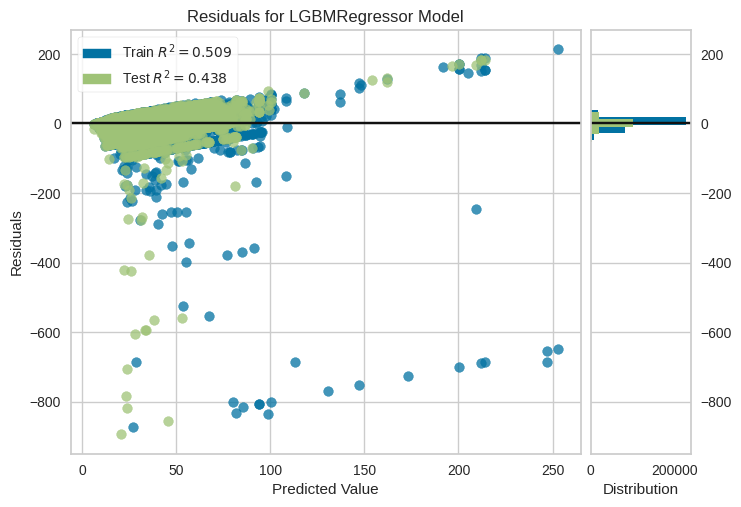

In [ ]:
plot_model(best, plot = 'residuals')

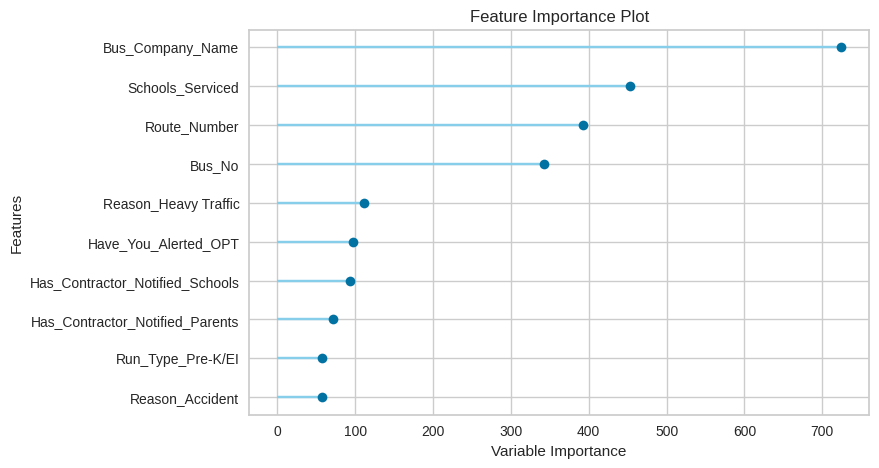

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)